<a href="https://colab.research.google.com/github/MohitM-AG/CV/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import json
import requests
from tqdm import tqdm

from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, BatchNormalization, Flatten, Dropout


In [2]:
img_set = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = img_set.load_data()



print('\nTrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('Test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))
print('Test_labels.shape: {}, of {}'.format(test_labels.shape, test_labels.dtype))

170498071/170498071 [==============================] - 3s 0us/step

Train_images.shape: (50000, 32, 32, 3), of uint8
Test_images.shape: (10000, 32, 32, 3), of uint8
Test_labels.shape: (10000, 1), of uint8


In [3]:
train_labels = train_labels.reshape(-1,)
print('Test_labels.shape: {}, of {}'.format(test_labels.shape, test_labels.dtype))

Test_labels.shape: (10000, 1), of uint8


In [4]:

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample(X, y, index):

  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


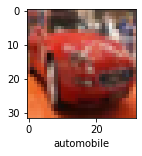

In [5]:
plot_sample(train_images, train_labels, 5)

In [6]:
# train_images = train_images/255
# test_images = test_images/255

In [7]:
INPUT_SHAPE = (32, 32, 3)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=32, kernel_size=(3, 3),padding='same',  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='same',  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128,  activation='relu'))
model.add(Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# view model layers
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                        

In [8]:
EPOCHS = 100
train_images_scaled = train_images / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,
restore_best_weights=True,
verbose=1)

history = model.fit(train_images_scaled, train_labels,
batch_size=32,
validation_split = 0.1,
callbacks=[es_callback], epochs=EPOCHS,
verbose=1)

Epoch 1/100
1407/1407 [==============================] - 99s 68ms/step - loss: 1.5502 - accuracy: 0.4382 - val_loss: 1.8898 - val_accuracy: 0.4206
Epoch 2/100
1407/1407 [==============================] - 87s 62ms/step - loss: 1.1952 - accuracy: 0.5782 - val_loss: 1.2173 - val_accuracy: 0.5666
Epoch 3/100
1407/1407 [==============================] - 90s 64ms/step - loss: 1.0406 - accuracy: 0.6346 - val_loss: 0.9679 - val_accuracy: 0.6518
Epoch 4/100
1407/1407 [==============================] - 89s 63ms/step - loss: 0.9364 - accuracy: 0.6754 - val_loss: 0.8091 - val_accuracy: 0.7170
Epoch 5/100
1407/1407 [==============================] - 88s 63ms/step - loss: 0.8624 - accuracy: 0.7013 - val_loss: 0.9410 - val_accuracy: 0.6688
Epoch 6/100
1407/1407 [==============================] - 93s 66ms/step - loss: 0.8061 - accuracy: 0.7218 - val_loss: 1.0091 - val_accuracy: 0.6580
Epoch 7/100
1407/1407 [==============================] - 92s 66ms/step - loss: 0.7581 - accuracy: 0.7387 - val_loss: 0

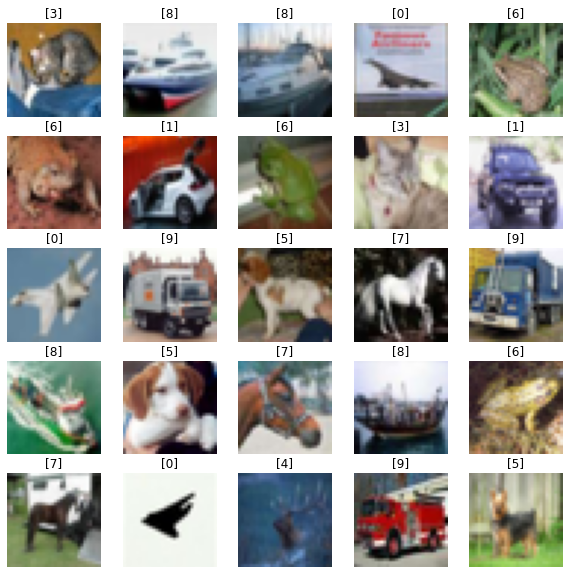

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(10,10))
axs = axs.ravel()

for i in range(25):
    axs[i].imshow(test_images[i])
    axs[i].set_title(test_labels[i])
    axs[i].axis('off')
plt.show()

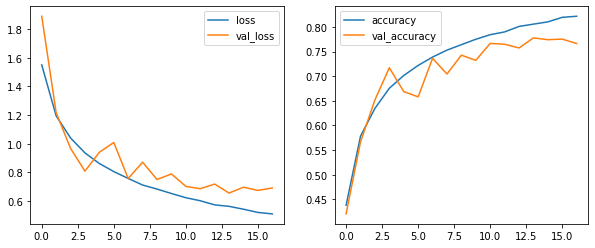

In [10]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [11]:
test_images_scaled = test_images / 255.
predictions = model.predict(test_images_scaled)
predictions[:5]

313/313 [==============================] - 6s 18ms/step


array([[5.15152188e-03, 2.64070753e-04, 3.17175896e-03, 7.74821460e-01,
        6.41403114e-03, 1.94134250e-01, 1.40253939e-02, 5.08488098e-04,
        6.62110979e-04, 8.46961921e-04],
       [2.76641618e-03, 6.85323700e-02, 8.59365900e-06, 2.06991172e-05,
        4.04980767e-07, 2.10943017e-06, 9.78936896e-07, 3.50341963e-07,
        9.28364933e-01, 3.03027948e-04],
       [1.08637966e-01, 1.24266641e-02, 8.56187951e-04, 4.88460879e-04,
        1.07247313e-03, 1.32744055e-04, 2.06124547e-04, 5.96176433e-05,
        8.55053425e-01, 2.10662819e-02],
       [9.78219330e-01, 2.04307271e-05, 3.83084756e-03, 4.50690789e-03,
        5.76120161e-04, 2.52336002e-04, 2.29757497e-05, 8.64111007e-06,
        1.24002807e-02, 1.62045471e-04],
       [2.01669522e-04, 4.54114233e-05, 2.18481198e-02, 8.61967076e-03,
        7.12618139e-03, 1.92630148e-04, 9.61703837e-01, 1.00037418e-04,
        7.16275536e-05, 9.07908543e-05]], dtype=float32)

In [12]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([3, 8, 8, 0, 6])

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(test_labels, prediction_labels, target_names=classes))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=classes, columns=classes)

              precision    recall  f1-score   support

    airplane       0.71      0.87      0.78      1000
  automobile       0.90      0.85      0.88      1000
        bird       0.66      0.69      0.67      1000
         cat       0.63      0.50      0.56      1000
        deer       0.76      0.70      0.73      1000
         dog       0.67      0.67      0.67      1000
        frog       0.83      0.80      0.82      1000
       horse       0.75      0.86      0.80      1000
        ship       0.86      0.86      0.86      1000
       truck       0.85      0.84      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,867,8,34,8,11,0,2,16,38,16
automobile,29,851,4,3,1,2,5,6,26,73
bird,78,3,686,37,71,46,31,35,7,6
cat,41,3,104,504,40,176,52,48,15,17
deer,28,2,60,49,698,36,42,75,8,2
dog,21,2,49,127,32,669,17,75,6,2
frog,11,5,68,44,26,16,803,9,16,2
horse,18,3,21,13,31,40,7,858,3,6
ship,73,14,11,7,4,4,2,3,863,19
truck,53,52,8,10,3,3,1,15,18,837
